# Credit Card Clients in Taiwan in 2005 - Box Plots, Count Plots & Histograms

---

### Context

Based on the financial capability of a client, they get a credit limit, i.e., the maximum amount they can spend in a month through a credit card.

The credit card companies maintain comprehensive data about each of their clients. By analysing the data, they can know what would be the maximum amount they won't be able to recover from their clients yet able to make a significant profit in a financial year to run a sustainable business.

---

### Problem Statement

The credit card clients dataset is full of irregularities and incorrect values. You need to replace them with the right values. Additionally, you have to create box plots, count plots and histograms to find a specific trend (if there exists) in the dataset.

---

---

### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are 25 features in the dataset. They are as follows:

|Column Name|Description|
|-|-|
|**ID**|Identification of each credit card client|
|||
|**LIMIT_BAL**|The maximum amount or credit (in NT dollar) a client can spend in a month (includes individual and family/supplementary credit)|
|||
|**SEX**|Gender of a client where`1` denotes male client and `2` denotes a female client|
|||
|**EDUCATION**|Education qualification of a credit card holder|
||`1` denotes that a client graduated from a graduate school |
||`2` denotes that a client is a university graduate|
||`3` denotes that a client is a high school graduate|
||`4` denotes that a client graduated from some other institution|
||`5` denotes that the graduation status of a client is unknown|
|||
|**MARRIAGE**|Marital status of a client|
||`1` denotes that the client is married|
||`2` denotes that the client is single or unmarried|
||`3` covers all the other possibilities of marital status such as divorced, widowed, etc.|
|||
|**`AGE`**|Age of a client in years|
|||
|**PAY_0**|Repayment status of a client in September 2005|
||`-1` denotes the payment is not due|
||`1` denotes that the payment is delayed by one month|
||`2` denotes that the payment is delayed by two months|
||...|
||`9` denotes that the payment is delayed by nine months|
|||


The other columns regarding repayment status of a client are as follows:

`PAY_2`: Repayment status of a client in August 2005 (scale same as above)

`PAY_3`: Repayment status of a client in July 2005 (scale same as above)

`PAY_4`: Repayment status of a client in June 2005 (scale same as above)

`PAY_5`: Repayment status of a client in May 2005 (scale same as above)

`PAY_6`: Repayment status of a client in April 2005 (scale same as above)

`BILL_AMT1`: Amount of bill statement in September 2005 (NT dollar)

`BILL_AMT2`: Amount of bill statement in August 2005 (NT dollar)

`BILL_AMT3`: Amount of bill statement in July 2005 (NT dollar)

`BILL_AMT4`: Amount of bill statement in June 2005 (NT dollar)

`BILL_AMT5`: Amount of bill statement in May 2005 (NT dollar)

`BILL_AMT6`: Amount of bill statement in April 2005 (NT dollar)

`PAY_AMT1`: Amount of previous payment in September 2005 (NT dollar)

`PAY_AMT2`: Amount of previous payment in August 2005 (NT dollar)

`PAY_AMT3`: Amount of previous payment in July 2005 (NT dollar)

`PAY_AMT4`: Amount of previous payment in June 2005 (NT dollar)

`PAY_AMT5`: Amount of previous payment in May 2005 (NT dollar)

`PAY_AMT6`: Amount of previous payment in April 2005 (NT dollar)

`default.payment.next.month`: The default payment status of a client in the following month (October) where

  - `1` means `yes` the client is a defaulter i.e., they failed to make the payment due in the following month

- `0` means `no` the client is NOT a defaulter i.e., they successfully made the payment due in the following month

### Acknowledgements

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and
Computer Science.

Click on the link provided below to get the original dataset from the UCI Machine Learning repository.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


---

### Things To Do

- Create a Pandas DataFrame for the Credit Card Clients in Taiwan dataset.

- The `EDUCATION, MARRIAGE` and `PAY_0` to `PAY_6` columns contain irregular or unwanted values. They need to be replaced with the correct values.

- Create box plots and histograms for all the columns containing the continuous numeric values.

- Create count plots for all the columns containing the categorical values, i.e., values such as discrete numeric values, string values, dates etc.



---

#### 1. Import Modules

First import all the necessary modules to create DataFrame and required graphs mentioned as follows:

- `numpy`
- `pandas`
- `matplotlib.pyplot`
- `seaborn`

In [35]:
# Import the modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

#### 2. Load The Dataset



In [36]:
# Load the dataset.
df=pd.read_csv("credit_card_defaults.csv",header=1)

Find out how many rows and columns are there in the dataset.

In [37]:
# Number of rows and columns using the 'shape' function.
df.shape

(30000, 25)

#### 3. Check For The Missing Values

Now, check whether the dataset contains any `NaN` or null or missing values.

In [8]:
# Previewing the dataset


In [38]:
# Check for the missing values by using the 'sum()' function on top of the 'isnull()' function.
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


**Q:** Are there any columns containing the missing values? If 'yes', name them.

**A:** No

---

### 4. Data Cleaning

The `EDUCATION`, and `MARRIAGE` columns contain irregular values. You need to replace them with the correct values.


#### 4.1 Education Qualification of Clients

The `EDUCATION` column must contain the following five different types of values:

- `1` denotes that a client graduated from a graduate school

- `2` denotes that a client is a university graduate

- `3` denotes that a client is a high school graduate

- `4` denotes that a client graduated from some other institution

- `5` denotes that the graduation status of a client is unknown

If there are any other values in the `EDUCATION` column, replace them with `5`. Also, get the counts of each value.

Calculate the counts of each value in the `EDUCATION` column.

In [39]:
# Counts of each value in the 'EDUCATION' column.
df['EDUCATION']=df['EDUCATION'].apply(lambda x:x if 1<= x<= 5 else 5)
ed_counts=df['EDUCATION'].value_counts().sort_index()
print(ed_counts)


EDUCATION
1    10585
2    14030
3     4917
4      123
5      345
Name: count, dtype: int64


**Hint**: You can get the counts of each value in the 'EDUCATION' column by using the `value_counts()` function.

**Q:** What value(s) is/are contained in the `EDUCATION` column apart from the values `1` to `5`? And what will you do with them?

**A:** Values apart from '1' to '5' are '0' and '6'. I'll replace them with '5' using the replace function on the 'EDUCATION' column.

In [40]:
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = 5
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = 5

**Hint**: You can replace the rows with `0` and `6` in the `Education` column by using the `loc[]` function.

Calculate the percentage of each value in the `EDUCATION` column.

In [41]:
# Percentage of each value in the 'EDUCATION' column.
ed_percent=(df['EDUCATION'].value_counts().sort_index())/300
print(ed_percent)

EDUCATION
1    35.283333
2    46.766667
3    16.390000
4     0.410000
5     1.150000
Name: count, dtype: float64


**Hint**: You can get the total number of counts of each value in the column by using the `value_counts()` function. Then you can calculate the percentage of each value by multiplying the total number of counts of each value with 100 and dividing the resultant value by the total number of rows in the DataFrame (`df.shape[0]`).

**Q:** What percent of clients were university graduates?

**A:** 46.766667

Create a count plot for the `EDUCATION` column.

<Axes: xlabel='EDUCATION', ylabel='count'>

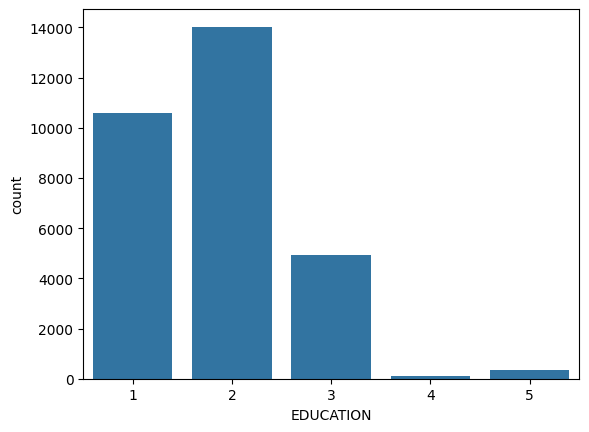

In [42]:
# Count plot for the 'EDUCATION' column using the 'countplot()' function of 'seaborn' module.
sns.countplot(x=df['EDUCATION'])

---

4.2 The `info()` Function

In [43]:
# Check the data-types of all the columns using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

As you can see, the data-types of all the columns are now available to you at once.

---

#### 4.3 Marital Status of Clients

The `MARRIAGE` column the contain the following three different types of values:

 - `1` denotes that a client is married

 - `2` denotes that a client is single

 - `3` denotes all other possible marital statuses such as divorced, widowed etc.

If there are any other values, then they should be replaced with `3` because it covers all the other possible cases of marital status of a client.

Calculate the counts of each value in the `MARRIAGE` column.

In [44]:
# Counts of each value in the 'MARRIAGE' column.
mar_counts=df['MARRIAGE'].value_counts
print(mar_counts)

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64>


**Q:** What value(s) is/are contained in the `MARRIAGE` column apart from the values `1, 2` and `3`? What are their counts?

**A:**



In [45]:
# Replace the unwanted values ('0') in the 'MARRIAGE' column with '3'. Ignore if there are none.
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3

Calculate the percentage of the values in the `MARRIAGE` column.

In [46]:
# Percentage of the values in the 'MARRIAGE' column.
mar_percent=(df['MARRIAGE'].value_counts().sort_index())/300
print(mar_percent)

MARRIAGE
1    45.530000
2    53.213333
3     1.256667
Name: count, dtype: float64


**Q:** What  of clients were married?

**A:**45.530000

Create a count plot for the `MARRIAGE` column.

<Axes: xlabel='MARRIAGE', ylabel='count'>

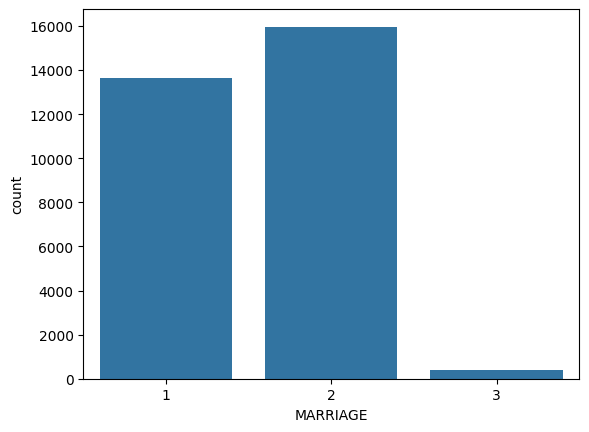

In [47]:
# Count plot for the 'MARRIAGE' column.
sns.countplot(x=df['MARRIAGE'])

---

### 5. Box Plots & Histograms

The final task is to create box plots and histograms for the columns containing continuous numeric values.

**Note:** All the histograms must have grids.

#### 5.1 Box Plot & Histogram For The `AGE` Column

Create a box plot for the `AGE` column.

<Axes: xlabel='AGE'>

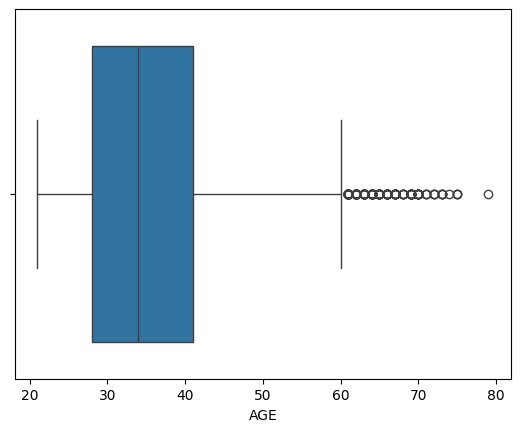

In [48]:
# Box plot for the 'AGE' column using the 'boxplot()' function.
sns.boxplot(x=df['AGE'])

**Q:** From the box plot for the `AGE` column, what is the approx median age of a credit card holder?

**A:**

Create a histogram for the `AGE` column.

<Axes: xlabel='AGE', ylabel='Count'>

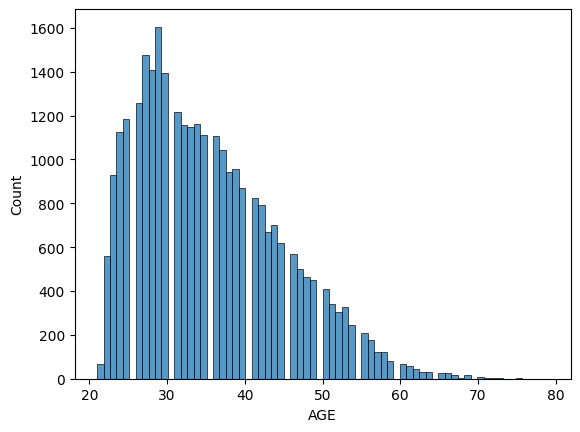

In [49]:
# Histogram for the 'AGE' column using 'distplot()' function from the 'seaborn' module.
sns.histplot(x=df['AGE'])

**Q:** Is there some peculiar pattern in the `AGE` histogram?

**A:**

---

#### 5.2 Box Plot & Histogram For The `LIMIT_BAL` Column

Create a box plot for the `LIMIT_BAL` column.

<Axes: xlabel='LIMIT_BAL'>

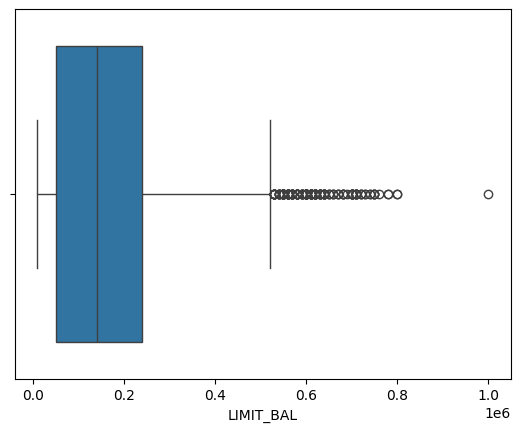

In [50]:
# Box plot for the LIMIT_BAL column.
sns.boxplot(x=df['LIMIT_BAL'])

Create a histogram for the `LIMIT_BAL` column using a function from the `seaborn` module.

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

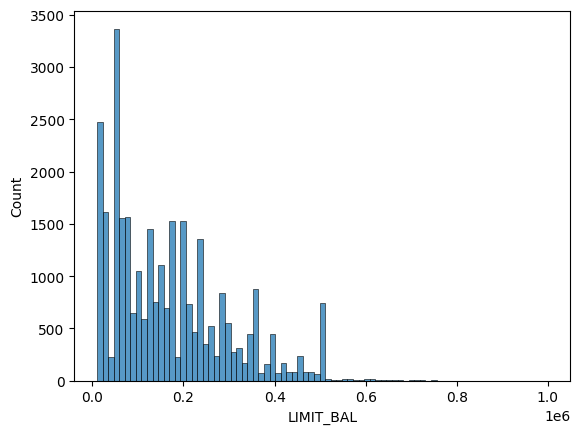

In [51]:
# Histogram for the 'LIMIT_BAL' column using 'distplot()' function from the 'seaborn' module.
sns.histplot(x=df['LIMIT_BAL'])

Create a histogram (having 50 bins) for the `LIMIT_BAL` column using a function from the `matplotlib.pyplot` module.

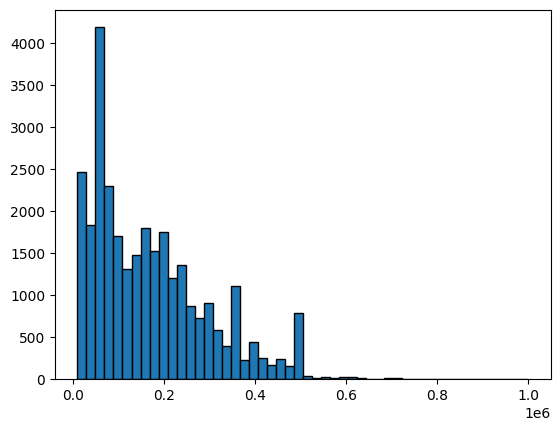

In [52]:
# Histogram (having 50 bins) for the 'LIMIT_BAL' column using 'hist()' function from the 'matplotlib.pyplot' module.
plt.hist(x=df['LIMIT_BAL'],bins=50,edgecolor='black')
plt.show()

**Q:** What happens to the counts of `LIMIT_BAL` values as the `LIMIT_BAL` values increases? What does it signify?

**A:**

---